In [1]:
%pip install pyreadstat --quiet

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_spss('CCAM SPSS Data 2008-2022.sav')

In [6]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own'],
      dtype='object')

In [4]:
np.unique(df["age_category"])

array(['18-34 years', '35-54 years', '55+ years'], dtype=object)

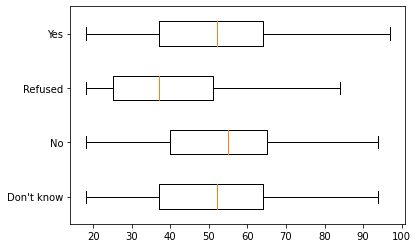

In [47]:
# age vs. ___

versus_var = "happening"

ages_by_category = []

category_values = df[versus_var].cat.categories

for response in category_values:
    ages_by_category.append(df[df[versus_var] == response]["age"])
    
plt.boxplot(ages_by_category, vert=False)
plt.yticks(ticks=[i+1 for i in range(len(category_values))], labels=category_values)
plt.show()

In [57]:
np.sum(df["weight_aggregate"])

28092.66713142408

In [ ]:
'''

each row - happening, or other

% of people who think global warming is happening
= sum the weights of rows for which "happening" = "Yes" / total number of rows

weighted # of people who think global warming is happening
= sum the weights

'''

In [102]:
df.head()

,case_ID,wave,year,weight_wave,weight_aggregate,happening,cause_original,cause_other_text,cause_recoded,sci_consensus,...,employment,house_head,house_size,house_ages0to1,house_ages2to5,house_ages6to12,house_ages13to17,house_ages18plus,house_type,house_own
0,2.0,Nov 2008,2008,0.54,0.269626,Yes,Caused mostly by human activities,,Caused mostly by human activities,Most scientists think global warming is happening,...,Not working - retired,Not head of household,3.0,0.0,0.0,0.0,0.0,3.0,One-family house detached from any other house,Owned by you or someone in your household
1,3.0,Nov 2008,2008,0.85,0.424411,Don't know,Caused mostly by human activities,,Caused mostly by human activities,Don't know enough to say,...,Not working - disabled,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,Mobile home,Rented
2,5.0,Nov 2008,2008,0.49,0.244660,Don't know,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,There is a lot of disagreement among scientist...,...,Not working - looking for work,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
3,6.0,Nov 2008,2008,0.29,0.144799,Yes,Caused mostly by natural changes in the enviro...,,Caused mostly by natural changes in the enviro...,Most scientists think global warming is happening,...,Not working - retired,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household
4,7.0,Nov 2008,2008,1.29,0.644106,Yes,Caused mostly by human activities,,Caused mostly by human activities,There is a lot of disagreement among scientist...,...,Working - as a paid employee,Head of household,2.0,0.0,0.0,0.0,0.0,2.0,One-family house detached from any other house,Owned by you or someone in your household


In [111]:
wave_counts = df["wave"].value_counts()
avg_wave_size = np.mean(wave_counts)

df["adam_weight_aggregate"] = df.apply(lambda row: (row.weight_wave / wave_counts[row.wave]) * avg_wave_size, axis=1)
df[["weight_aggregate", "adam_weight_aggregate"]]

,weight_aggregate,adam_weight_aggregate
0,0.269626,0.289234
1,0.424411,0.455275
2,0.244660,0.262453
3,0.144799,0.155329
4,0.644106,0.690947
...,...,...
30131,1.575959,1.690567
30132,0.886371,0.950830
30133,1.165305,1.250050
30134,0.687147,0.737118


In [119]:
# pd.pivot_table(df, values="weight_aggregate", columns=["wave"], aggfunc="sum")
# pd.pivot_table(df, values="adam_weight_aggregate", columns=["wave"], aggfunc="sum")

In [121]:
# income vs. concern for everyone
pd.crosstab(df["happening"], df["income_category"], values=df["adam_weight_aggregate"], aggfunc="sum", margins=True, normalize="columns")

income_category,"$100,000 or more","$50,000 to $99,999","Less than $50,000",All
happening,,,,
Don't know,0.132086,0.160323,0.208693,0.170923
No,0.146867,0.160930,0.136279,0.147304
Refused,0.001609,0.002659,0.004492,0.003067
Yes,0.719438,0.676088,0.650536,0.678706


In [136]:
# income vs. concern for democrats
dem = df[df["party"] == "Democrat"]
pd.crosstab(dem["happening"], dem["educ_category"], values=dem["adam_weight_aggregate"], aggfunc="sum", margins=True, normalize="columns")
# pd.crosstab(dem["happening"], dem["income_category"], values=dem["adam_weight_aggregate"], aggfunc="sum", margins=True)

educ_category,Bachelor's degree or higher,High school,Less than high school,Some college,All
happening,,,,,
Don't know,0.039642,0.164373,0.221749,0.088259,0.110293
No,0.016585,0.050880,0.061283,0.036127,0.037003
Refused,0.000000,0.002023,0.002857,0.000335,0.001013
Yes,0.943773,0.782723,0.714111,0.875278,0.851691


In [137]:
# income vs. concern for indepedent party
indp = df[df["party"] == "Independent"]
pd.crosstab(indp["happening"], indp["educ_category"], values=indp["adam_weight_aggregate"], aggfunc="sum", margins=True, normalize="columns")

educ_category,Bachelor's degree or higher,High school,Less than high school,Some college,All
happening,,,,,
Don't know,0.127517,0.189892,0.210274,0.141826,0.154869
No,0.114516,0.163552,0.159367,0.162165,0.145321
Refused,0.000187,0.001428,0.000000,0.000896,0.000706
Yes,0.757779,0.645129,0.630359,0.695113,0.699104


In [138]:
# income vs. concern for republicans
repub = df[df["party"] == "Republican"]
pd.crosstab(repub["happening"], repub["educ_category"], values=repub["adam_weight_aggregate"], aggfunc="sum", margins=True, normalize="columns")

educ_category,Bachelor's degree or higher,High school,Less than high school,Some college,All
happening,,,,,
Don't know,0.174845,0.227292,0.238481,0.216181,0.209075
No,0.292671,0.304368,0.272574,0.328212,0.305767
Refused,0.000087,0.000463,0.000000,0.000465,0.000313
Yes,0.532397,0.467878,0.488945,0.455143,0.484845


In [135]:
df.columns

Index(['case_ID', 'wave', 'year', 'weight_wave', 'weight_aggregate',
       'happening', 'cause_original', 'cause_other_text', 'cause_recoded',
       'sci_consensus', 'worry', 'harm_personally', 'harm_US',
       'harm_dev_countries', 'harm_future_gen', 'harm_plants_animals',
       'when_harm_US', 'reg_CO2_pollutant', 'reg_utilities', 'fund_research',
       'reg_coal_emissions', 'discuss_GW', 'hear_GW_media', 'gender', 'age',
       'age_category', 'generation', 'educ', 'educ_category', 'income',
       'income_category', 'race', 'ideology', 'party', 'party_w_leaners',
       'party_x_ideo', 'registered_voter', 'region9', 'region4', 'religion',
       'religion_other_nonchristian', 'evangelical', 'service_attendance',
       'marit_status', 'employment', 'house_head', 'house_size',
       'house_ages0to1', 'house_ages2to5', 'house_ages6to12',
       'house_ages13to17', 'house_ages18plus', 'house_type', 'house_own',
       'adam_weight_aggregate'],
      dtype='object')